In [41]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from astropy.convolution.kernels import CustomKernel

In [42]:
%matplotlib inline

In [43]:
plt.style.use('court.mplstyle')

In [44]:
# atlas = pd.read_csv('../data/RCB_LC_FORTESTING/2023-06-15_WISEJ194218.38-203247.5_ATLAS.csv')
# atlas = pd.read_csv('../data/RCB_LC_FORTESTING/2023-06-15_AOHer_ATLAS.csv')
atlas = pd.read_csv('../data/RCB_LC_FORTESTING/2023-06-19_ASAS-RCB-14_ATLAS.csv')
# atlas = pd.read_csv('../data/RCB_LC_FORTESTING/2023-06-19_ASAS-RCB-16_ATLAS.csv')
# atlas = pd.read_csv('../data/RCB_LC_FORTESTING/2023-06-19_ASAS-RCB-19_ATLAS.csv')
atlas

,mjd,m,dm,ujy,dujy,f,err,reduced_chi,ra,dec,x,y,maj,min,phi,apfit,mag5sig,sky,obs
0,57228.312996,15.750,0.023,1820.0,42.0,o,0,1.77,251.87391,-15.42304,7376.48,8986.20,3.50,3.44,-76.1,-0.475,18.61,19.73,02a57228o0091o
1,57228.336591,15.729,0.022,1856.0,40.0,o,0,1.52,251.87391,-15.42304,5894.92,10454.92,3.50,3.23,-4.0,-0.472,18.60,19.72,02a57228o0116o
2,57228.340302,15.703,0.021,1900.0,40.0,o,0,1.74,251.87391,-15.42304,9112.80,733.87,3.67,3.31,89.9,-0.477,18.66,19.79,02a57228o0120o
3,57228.362466,15.758,0.026,1806.0,46.0,o,0,1.00,251.87391,-15.42304,5898.51,10460.16,3.45,3.16,-8.5,-0.478,18.62,19.72,02a57228o0144o
4,57228.366169,15.737,0.022,1842.0,40.0,o,0,1.58,251.87391,-15.42304,9114.39,738.79,3.64,3.23,-81.0,-0.471,18.68,19.82,02a57228o0148o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,60102.016247,17.698,0.097,302.0,29.0,o,0,1.08,251.87391,-15.42304,8482.84,8720.26,2.99,2.37,-18.1,-0.393,18.61,19.18,03a60102o0701o
2941,60102.055586,17.709,0.107,300.0,32.0,o,0,1.50,251.87391,-15.42304,8429.85,8798.32,3.58,2.80,-5.8,-0.429,18.31,18.99,03a60102o0747o
2942,60109.173979,18.482,0.085,147.0,12.0,c,0,3.07,251.87391,-15.42304,3660.82,2261.67,2.46,2.22,47.8,-0.384,19.34,21.39,04a60109o0493c
2943,60109.177839,18.499,0.081,145.0,12.0,c,0,3.04,251.87391,-15.42304,3682.33,2296.87,2.29,2.09,47.8,-0.390,19.40,21.37,04a60109o0500c


In [45]:
oband = atlas[atlas['f']=='o']
oband

,mjd,m,dm,ujy,dujy,f,err,reduced_chi,ra,dec,x,y,maj,min,phi,apfit,mag5sig,sky,obs
0,57228.312996,15.750,0.023,1820.0,42.0,o,0,1.77,251.87391,-15.42304,7376.48,8986.20,3.50,3.44,-76.1,-0.475,18.61,19.73,02a57228o0091o
1,57228.336591,15.729,0.022,1856.0,40.0,o,0,1.52,251.87391,-15.42304,5894.92,10454.92,3.50,3.23,-4.0,-0.472,18.60,19.72,02a57228o0116o
2,57228.340302,15.703,0.021,1900.0,40.0,o,0,1.74,251.87391,-15.42304,9112.80,733.87,3.67,3.31,89.9,-0.477,18.66,19.79,02a57228o0120o
3,57228.362466,15.758,0.026,1806.0,46.0,o,0,1.00,251.87391,-15.42304,5898.51,10460.16,3.45,3.16,-8.5,-0.478,18.62,19.72,02a57228o0144o
4,57228.366169,15.737,0.022,1842.0,40.0,o,0,1.58,251.87391,-15.42304,9114.39,738.79,3.64,3.23,-81.0,-0.471,18.68,19.82,02a57228o0148o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,60091.925509,18.020,0.075,225.0,17.0,o,0,4.50,251.87391,-15.42304,4170.15,5653.47,2.21,2.05,-30.2,-0.403,19.29,20.31,03a60092o0495o
2934,60091.933577,17.917,0.054,247.0,13.0,o,0,9.08,251.87391,-15.42304,4227.79,5730.06,2.37,2.12,-22.6,-0.403,19.26,20.41,03a60092o0512o
2935,60091.935140,17.860,0.054,261.0,14.0,o,0,6.59,251.87391,-15.42304,4249.28,5614.83,2.33,2.08,-28.8,-0.399,19.30,20.40,03a60092o0515o
2940,60102.016247,17.698,0.097,302.0,29.0,o,0,1.08,251.87391,-15.42304,8482.84,8720.26,2.99,2.37,-18.1,-0.393,18.61,19.18,03a60102o0701o


In [46]:
oband = oband.sort_values(by=['mjd'],axis=0,ascending=True,ignore_index=True)
oband

,mjd,m,dm,ujy,dujy,f,err,reduced_chi,ra,dec,x,y,maj,min,phi,apfit,mag5sig,sky,obs
0,57228.312996,15.750,0.023,1820.0,42.0,o,0,1.77,251.87391,-15.42304,7376.48,8986.20,3.50,3.44,-76.1,-0.475,18.61,19.73,02a57228o0091o
1,57228.336591,15.729,0.022,1856.0,40.0,o,0,1.52,251.87391,-15.42304,5894.92,10454.92,3.50,3.23,-4.0,-0.472,18.60,19.72,02a57228o0116o
2,57228.340302,15.703,0.021,1900.0,40.0,o,0,1.74,251.87391,-15.42304,9112.80,733.87,3.67,3.31,89.9,-0.477,18.66,19.79,02a57228o0120o
3,57228.362466,15.758,0.026,1806.0,46.0,o,0,1.00,251.87391,-15.42304,5898.51,10460.16,3.45,3.16,-8.5,-0.478,18.62,19.72,02a57228o0144o
4,57228.366169,15.737,0.022,1842.0,40.0,o,0,1.58,251.87391,-15.42304,9114.39,738.79,3.64,3.23,-81.0,-0.471,18.68,19.82,02a57228o0148o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,60091.925509,18.020,0.075,225.0,17.0,o,0,4.50,251.87391,-15.42304,4170.15,5653.47,2.21,2.05,-30.2,-0.403,19.29,20.31,03a60092o0495o
2162,60091.933577,17.917,0.054,247.0,13.0,o,0,9.08,251.87391,-15.42304,4227.79,5730.06,2.37,2.12,-22.6,-0.403,19.26,20.41,03a60092o0512o
2163,60091.935140,17.860,0.054,261.0,14.0,o,0,6.59,251.87391,-15.42304,4249.28,5614.83,2.33,2.08,-28.8,-0.399,19.30,20.40,03a60092o0515o
2164,60102.016247,17.698,0.097,302.0,29.0,o,0,1.08,251.87391,-15.42304,8482.84,8720.26,2.99,2.37,-18.1,-0.393,18.61,19.18,03a60102o0701o


In [47]:
oband = oband.drop_duplicates(subset=['mjd'],ignore_index=True) 
    # this keeps the first entry, I'd love if it took an average
oband

,mjd,m,dm,ujy,dujy,f,err,reduced_chi,ra,dec,x,y,maj,min,phi,apfit,mag5sig,sky,obs
0,57228.312996,15.750,0.023,1820.0,42.0,o,0,1.77,251.87391,-15.42304,7376.48,8986.20,3.50,3.44,-76.1,-0.475,18.61,19.73,02a57228o0091o
1,57228.336591,15.729,0.022,1856.0,40.0,o,0,1.52,251.87391,-15.42304,5894.92,10454.92,3.50,3.23,-4.0,-0.472,18.60,19.72,02a57228o0116o
2,57228.340302,15.703,0.021,1900.0,40.0,o,0,1.74,251.87391,-15.42304,9112.80,733.87,3.67,3.31,89.9,-0.477,18.66,19.79,02a57228o0120o
3,57228.362466,15.758,0.026,1806.0,46.0,o,0,1.00,251.87391,-15.42304,5898.51,10460.16,3.45,3.16,-8.5,-0.478,18.62,19.72,02a57228o0144o
4,57228.366169,15.737,0.022,1842.0,40.0,o,0,1.58,251.87391,-15.42304,9114.39,738.79,3.64,3.23,-81.0,-0.471,18.68,19.82,02a57228o0148o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,60091.925509,18.020,0.075,225.0,17.0,o,0,4.50,251.87391,-15.42304,4170.15,5653.47,2.21,2.05,-30.2,-0.403,19.29,20.31,03a60092o0495o
2162,60091.933577,17.917,0.054,247.0,13.0,o,0,9.08,251.87391,-15.42304,4227.79,5730.06,2.37,2.12,-22.6,-0.403,19.26,20.41,03a60092o0512o
2163,60091.935140,17.860,0.054,261.0,14.0,o,0,6.59,251.87391,-15.42304,4249.28,5614.83,2.33,2.08,-28.8,-0.399,19.30,20.40,03a60092o0515o
2164,60102.016247,17.698,0.097,302.0,29.0,o,0,1.08,251.87391,-15.42304,8482.84,8720.26,2.99,2.37,-18.1,-0.393,18.61,19.18,03a60102o0701o


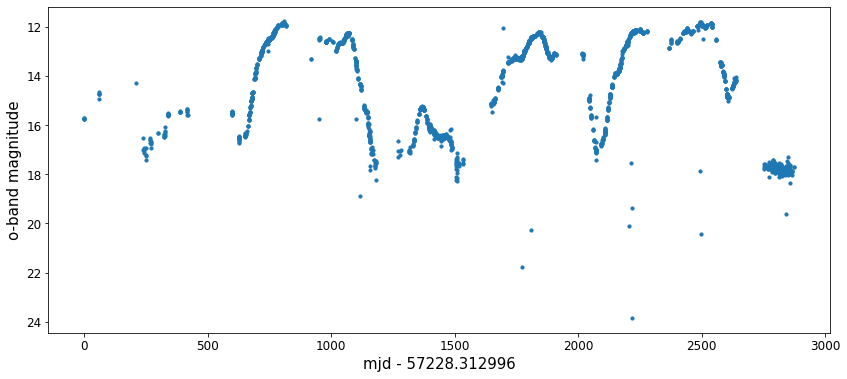

In [48]:
plt.figure(figsize=(14,6))
plt.scatter(oband['mjd']-oband['mjd'][0],oband['m'],s=10)
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('o-band magnitude')
plt.show()

In [49]:
median_filtered = sp.signal.medfilt(oband['m'],kernel_size=5)

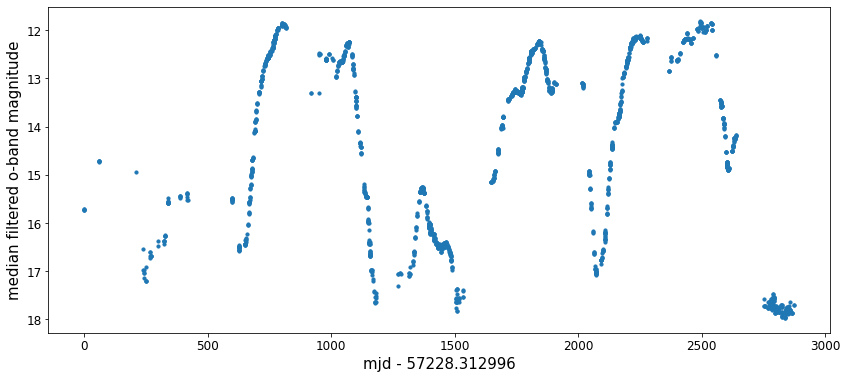

In [50]:
plt.figure(figsize=(14,6))
plt.scatter(oband['mjd']-oband['mjd'][0],median_filtered,s=10)
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('median filtered o-band magnitude')
plt.show()

In [51]:
smoothed_flux = convolve(oband['m'], Gaussian1DKernel(20),boundary='extend')

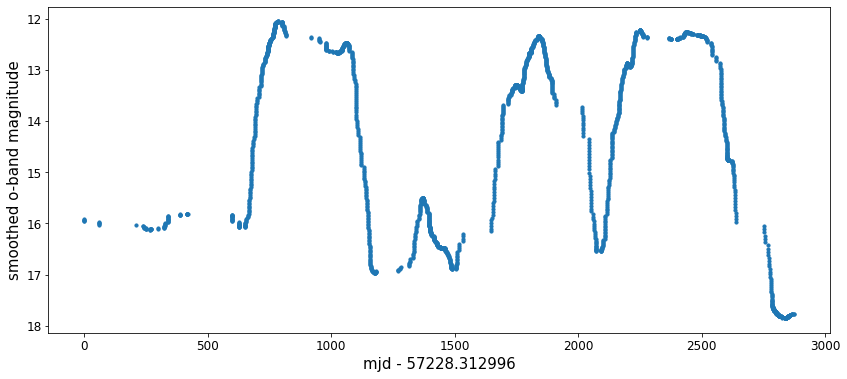

In [52]:
plt.figure(figsize=(14,6))
plt.scatter(oband['mjd']-oband['mjd'][0],smoothed_flux,s=10)
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('smoothed o-band magnitude')
plt.show()

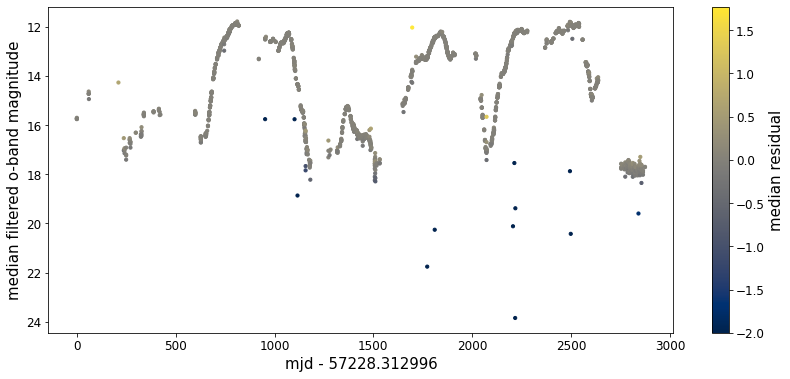

In [53]:
plt.figure(figsize=(14,6))
plt.scatter(oband['mjd']-oband['mjd'][0],oband['m'],s=10,
            c=median_filtered-oband['m'],cmap='cividis')
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='median residual')
# plt.clim(vmax=-1)
plt.clim(vmin=-2)
plt.show()

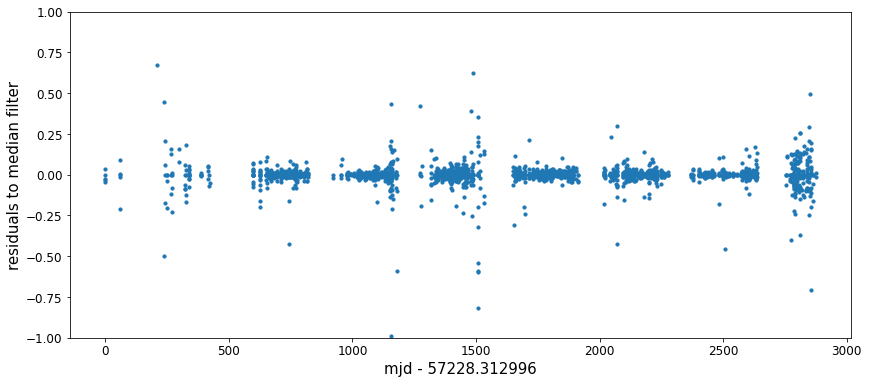

In [54]:
plt.figure(figsize=(14,6))
plt.scatter(oband['mjd']-oband['mjd'][0],median_filtered-oband['m'],s=10)
# plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('residuals to median filter')
plt.ylim(-1,1)
plt.show()

In [55]:
mask = np.where(np.abs(median_filtered-oband['m'])<0.25,True,False)
mask

array([ True,  True,  True, ...,  True,  True,  True])

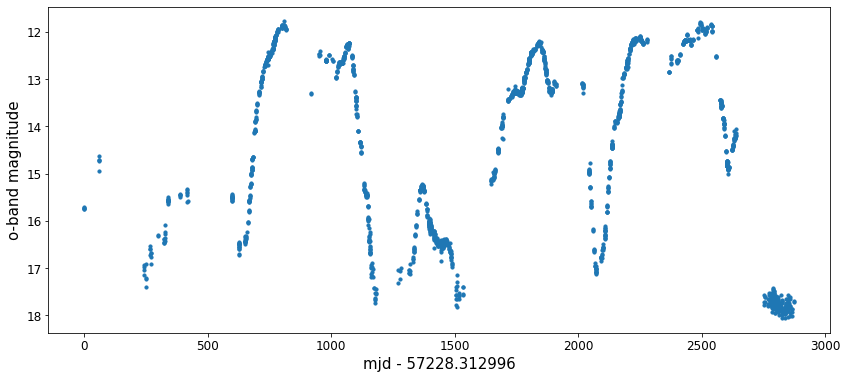

In [56]:
plt.figure(figsize=(14,6))
plt.scatter(oband['mjd'][mask]-oband['mjd'][0],oband['m'][mask],s=10)
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('o-band magnitude')
plt.show()

In [57]:
median_filtered_oband = oband.iloc[mask]
median_filtered_oband.reset_index(drop=True,inplace=True)
median_filtered_oband

,mjd,m,dm,ujy,dujy,f,err,reduced_chi,ra,dec,x,y,maj,min,phi,apfit,mag5sig,sky,obs
0,57228.312996,15.750,0.023,1820.0,42.0,o,0,1.77,251.87391,-15.42304,7376.48,8986.20,3.50,3.44,-76.1,-0.475,18.61,19.73,02a57228o0091o
1,57228.336591,15.729,0.022,1856.0,40.0,o,0,1.52,251.87391,-15.42304,5894.92,10454.92,3.50,3.23,-4.0,-0.472,18.60,19.72,02a57228o0116o
2,57228.340302,15.703,0.021,1900.0,40.0,o,0,1.74,251.87391,-15.42304,9112.80,733.87,3.67,3.31,89.9,-0.477,18.66,19.79,02a57228o0120o
3,57228.362466,15.758,0.026,1806.0,46.0,o,0,1.00,251.87391,-15.42304,5898.51,10460.16,3.45,3.16,-8.5,-0.478,18.62,19.72,02a57228o0144o
4,57228.366169,15.737,0.022,1842.0,40.0,o,0,1.58,251.87391,-15.42304,9114.39,738.79,3.64,3.23,-81.0,-0.471,18.68,19.82,02a57228o0148o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,60091.925509,18.020,0.075,225.0,17.0,o,0,4.50,251.87391,-15.42304,4170.15,5653.47,2.21,2.05,-30.2,-0.403,19.29,20.31,03a60092o0495o
2119,60091.933577,17.917,0.054,247.0,13.0,o,0,9.08,251.87391,-15.42304,4227.79,5730.06,2.37,2.12,-22.6,-0.403,19.26,20.41,03a60092o0512o
2120,60091.935140,17.860,0.054,261.0,14.0,o,0,6.59,251.87391,-15.42304,4249.28,5614.83,2.33,2.08,-28.8,-0.399,19.30,20.40,03a60092o0515o
2121,60102.016247,17.698,0.097,302.0,29.0,o,0,1.08,251.87391,-15.42304,8482.84,8720.26,2.99,2.37,-18.1,-0.393,18.61,19.18,03a60102o0701o


In [58]:
# edge_detect = sp.ndimage.convolve(oband['m'][mask], CustomKernel([1.0, 0.0, -1.0]))
edge_detect = sp.ndimage.convolve(median_filtered_oband['m'], [1.0, 0.0, -1.0])

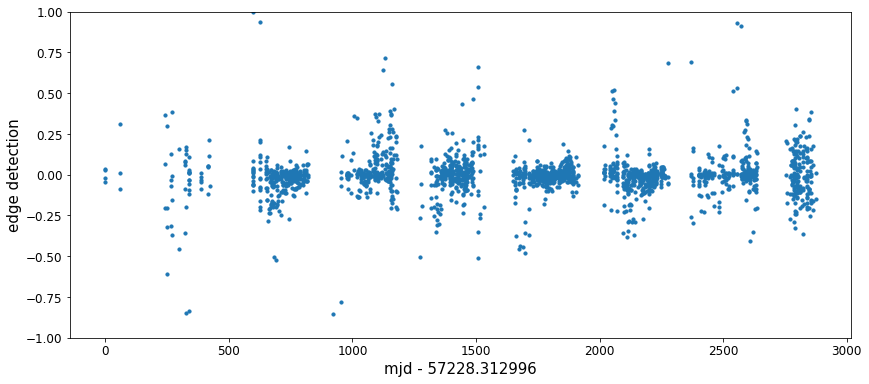

In [59]:
mjd_scale = median_filtered_oband['mjd'][0]

plt.figure(figsize=(14,6))
plt.scatter(median_filtered_oband['mjd']-mjd_scale,edge_detect,s=10)
# plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('edge detection')
plt.ylim(-1,1)
plt.show()

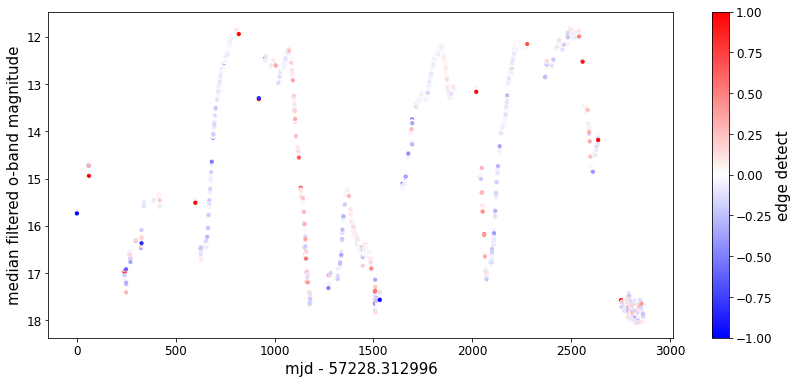

In [60]:
plt.figure(figsize=(14,6))
plt.scatter(median_filtered_oband['mjd']-mjd_scale,median_filtered_oband['m'],s=10,
            c=edge_detect,cmap='bwr')
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='edge detect')
# plt.clim(vmax=-1)
# plt.clim(vmin=-1)
plt.clim(-1,1)
plt.show()

### added in a gaussian smooth before the interpolation here

In [61]:
smoothed_flux = convolve(median_filtered_oband['m'], Gaussian1DKernel(20),boundary='extend')

# interpolation_function = sp.interpolate.interp1d(np.asarray(median_filtered_oband['mjd']-mjd_scale),
#                                                  np.asarray(median_filtered_oband['m']),
#                                                  kind='slinear')
interpolation_function = sp.interpolate.interp1d(np.asarray(median_filtered_oband['mjd']-mjd_scale),
                                                 np.asarray(smoothed_flux),
                                                 kind='slinear')
## what time resolution? I don't want to lose any of the real data if possible
real_resolution = np.median(np.diff(median_filtered_oband['mjd']))
len_data = np.max(median_filtered_oband['mjd']-mjd_scale)
resample_time = np.linspace(0,len_data,int(len_data))#int(len_data/(real_resolution/10000)))
## currently resampling at a resolution of 1 day
resample_flux = interpolation_function(resample_time)

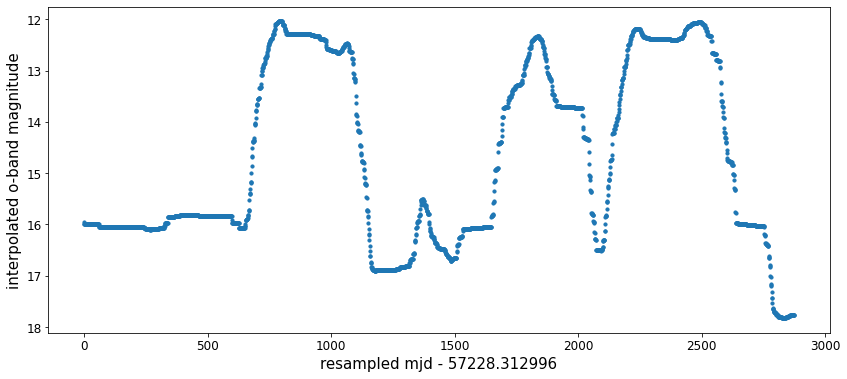

In [62]:
plt.figure(figsize=(14,6))
plt.scatter(resample_time,resample_flux,s=10)
plt.gca().invert_yaxis()
plt.xlabel('resampled mjd - '+str(oband['mjd'][0]))
plt.ylabel('interpolated o-band magnitude')
plt.show()

In [63]:
new_edge_detect = sp.ndimage.convolve(resample_flux, [1.0, 0.0, -1.0])

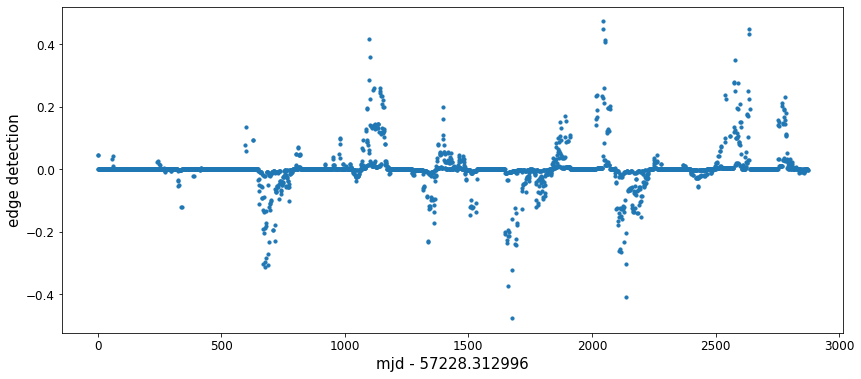

In [64]:
plt.figure(figsize=(14,6))
plt.scatter(resample_time,new_edge_detect,s=10)
# plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(oband['mjd'][0]))
plt.ylabel('edge detection')
# plt.ylim(-1,1)
plt.show()

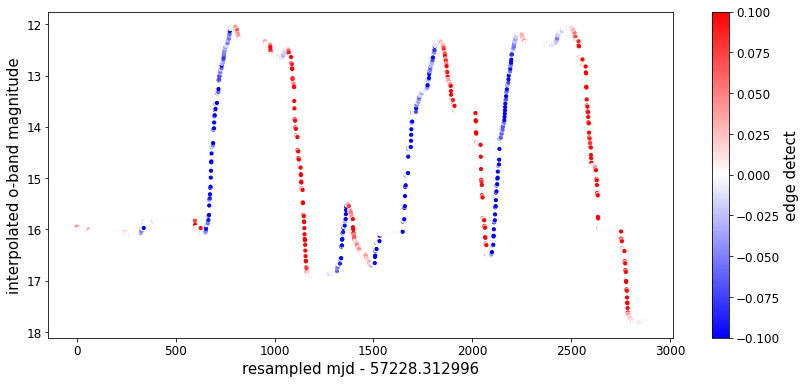

In [65]:
plt.figure(figsize=(14,6))
# plt.scatter(resample_time,(new_edge_detect+3)*4,s=10)
plt.scatter(resample_time,resample_flux,s=10,
            c=new_edge_detect,cmap='bwr')#,alpha=0.2)
# plt.scatter(resample_time,(new_edge_detect+3)*4,s=10)
plt.gca().invert_yaxis()
plt.xlabel('resampled mjd - '+str(oband['mjd'][0]))
plt.ylabel('interpolated o-band magnitude')
plt.colorbar(label='edge detect')
# plt.clim(vmax=-1)
# plt.clim(vmin=-1)
plt.clim(-0.1,0.1)
# lim = np.max([np.abs(np.min(new_edge_detect)),np.max(new_edge_detect)])
# plt.clim(-lim,lim)
# plt.savefig('/Users/ccra8514/Desktop/edge_detect',bbox_inches='tight')
plt.show()

In [66]:
## interpolate the edge detection to convert back to the original times
edge_detect_interp_func = sp.interpolate.interp1d(resample_time,
                                                 new_edge_detect,
                                                 kind='slinear')

edges_realdata = edge_detect_interp_func(median_filtered_oband['mjd']-mjd_scale)


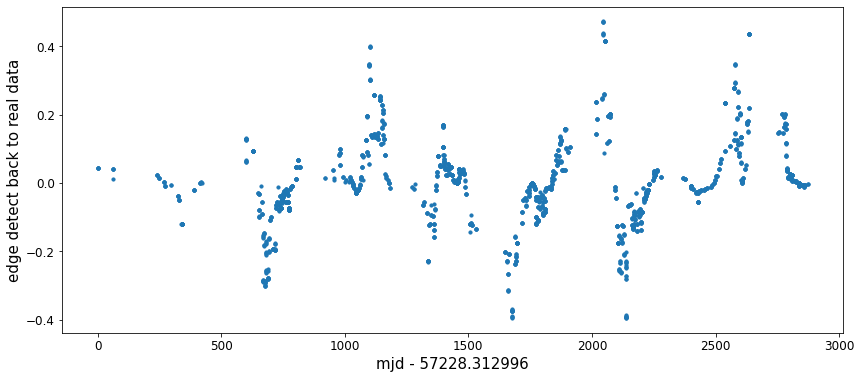

In [67]:
plt.figure(figsize=(14,6))
plt.scatter(median_filtered_oband['mjd']-mjd_scale,edges_realdata,s=10)
# plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('edge detect back to real data')
# plt.colorbar(label='edge detect')
# plt.clim(vmax=-1)
# plt.clim(vmin=-1)
# plt.clim(-1,1)
plt.show()

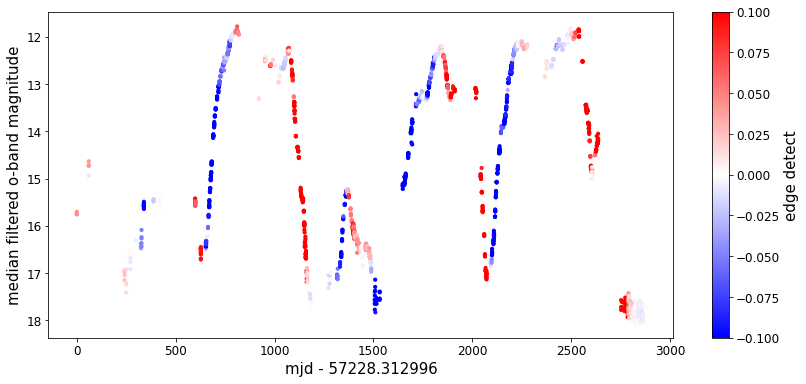

In [68]:
plt.figure(figsize=(14,6))
# plt.scatter(oband['mjd'][mask]-oband['mjd'][0],(edges_realdata+3)*4,s=10)
plt.scatter(median_filtered_oband['mjd']-mjd_scale,median_filtered_oband['m'],s=10,
            c=(edges_realdata),cmap='bwr')
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='edge detect')
# plt.clim(vmax=-1)
# plt.clim(vmin=-1)
plt.clim(-0.1,0.1)
# plt.xlim(950,1200)
# plt.xlim(500,1000)
# plt.savefig('/Users/ccra8514/Desktop/edge_detect',bbox_inches='tight')
plt.show()

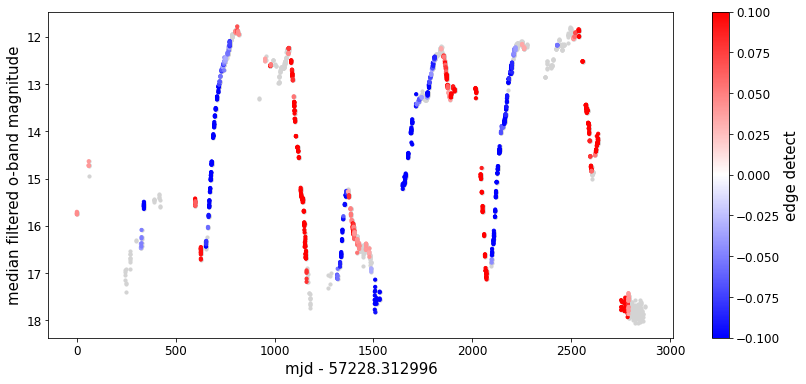

In [69]:
std_dev = np.std(edges_realdata)
# std_dev
new_mask = np.where(np.abs(edges_realdata)>(std_dev*0.25),True,False)

plt.figure(figsize=(14,6))
# plt.scatter(oband['mjd'][mask]-oband['mjd'][0],(edges_realdata+3)*4,s=10)
plt.scatter(median_filtered_oband['mjd']-mjd_scale,median_filtered_oband['m'],s=10,color='lightgrey')
plt.scatter(median_filtered_oband['mjd'][new_mask]-mjd_scale,median_filtered_oband['m'][new_mask],s=10,
            c=(edges_realdata[new_mask]),cmap='bwr')
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='edge detect')
plt.clim(-0.1,0.1)
# plt.xlim(950,1200)
# plt.xlim(500,1000)
plt.show()

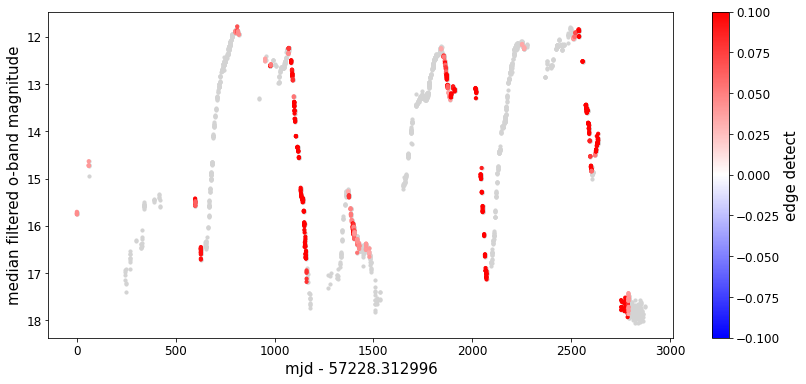

In [70]:
std_dev = np.std(edges_realdata)
new_mask = np.where(np.abs(edges_realdata)>(std_dev*0.25),True,False)
downslope_mask = np.where(edges_realdata>0.0,True,False)
total_mask = new_mask & downslope_mask

plt.figure(figsize=(14,6))
# plt.scatter(oband['mjd'][mask]-oband['mjd'][0],(edges_realdata+3)*4,s=10)
plt.scatter(median_filtered_oband['mjd']-mjd_scale,median_filtered_oband['m'],s=10,color='lightgrey')
plt.scatter(median_filtered_oband['mjd'][total_mask]-mjd_scale,median_filtered_oband['m'][total_mask],s=10,
            c=(edges_realdata[total_mask]),cmap='bwr')
plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='edge detect')
plt.clim(-0.1,0.1)
# plt.xlim(950,1200)
# plt.xlim(500,1000)
plt.show()

In [71]:
print(median_filtered_oband['mjd'][total_mask]-mjd_scale)

0          0.000000
1          0.023595
2          0.027306
3          0.049470
4          0.053173
           ...     
2005    2791.042477
2006    2791.044282
2007    2791.044732
2008    2791.047577
2009    2791.053435
Name: mjd, Length: 710, dtype: float64


In [72]:
def find_runs(x):
    x = np.asanyarray(x)
    n = x.shape[0]
    
    # find run starts
    loc_run_start = np.empty(n, dtype=bool)
    loc_run_start[0] = True
    np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
    run_starts = np.nonzero(loc_run_start)[0]

    # find run values
    run_values = x[loc_run_start]

    # find run lengths
    run_lengths = np.diff(np.append(run_starts, n))

    return run_values, run_starts, run_lengths

In [73]:
run_vals, run_start, run_length = find_runs(total_mask)

In [74]:
downward_mask = run_start[np.logical_and(run_vals==True,run_length > 3)]
upward_mask = run_start[np.logical_and(run_vals==False,run_length > 3)]

In [75]:
median_filtered_oband['mjd'][downward_mask]-mjd_scale

0          0.000000
62       598.221567
345      802.902387
375      978.259154
463     1070.098094
476     1084.099228
699     1376.207365
776     1417.137864
793     1427.116113
869     1462.027567
885     1479.015904
1229    1842.978970
1243    1854.993108
1657    2251.930140
1673    2261.903134
1778    2512.070965
1915    2620.701242
Name: mjd, dtype: float64

In [76]:
median_filtered_oband['mjd'][run_start]

0       57228.312996
9       57289.248596
62      57826.534563
92      57878.589892
345     58031.215383
368     58148.656044
370     58180.589659
373     58182.663329
375     58206.572150
391     58220.611549
463     58298.411090
475     58302.446623
476     58312.412224
610     58392.246354
695     58600.525249
697     58600.542784
699     58604.520361
768     58636.435783
776     58645.450860
789     58654.410403
793     58655.429109
805     58660.379394
869     58690.340563
877     58695.362958
885     58707.328900
891     58711.306909
1229    59071.291966
1233    59072.358145
1243    59083.306104
1394    59321.476837
1657    59480.243136
1661    59481.214561
1673    59490.216130
1681    59506.201282
1778    59740.383961
1889    59833.098061
1915    59849.014238
2010    60022.333690
Name: mjd, dtype: float64

In [77]:
median_filtered_oband['m'][run_start]

0       15.750
9       14.942
62      15.524
92      16.344
345     11.918
368     13.320
370     12.463
373     12.503
375     12.620
391     12.491
463     12.363
475     12.295
476     12.504
610     16.893
695     15.288
697     15.288
699     15.357
768     16.214
776     16.293
789     16.457
793     16.361
805     16.447
869     16.495
877     16.472
885     16.549
891     16.653
1229    12.264
1233    12.253
1243    12.397
1394    16.772
1657    12.163
1661    12.176
1673    12.260
1681    12.225
1778    12.033
1889    14.880
1915    14.474
2010    17.482
Name: m, dtype: float64

In [78]:
decline_onset = []
decline_end = []
for i in range(0,len(median_filtered_oband['m'][run_start])):
    if i == 0 and np.abs(median_filtered_oband['m'].iloc[0] - median_filtered_oband['m'][run_start[i+1]]) > 0.8:
        ## adding the absolute magnitude should detect beginning declines
        ## NEEDS TO BE TESTED
        decline_onset.append(0)
        print('beginning')
        print('0')
        print(median_filtered_oband['mjd'][0])
        print(np.abs(median_filtered_oband['m'].iloc[0] - median_filtered_oband['m'][run_start[i]]))
    elif i == len(median_filtered_oband['m'][run_start])-1:
        if median_filtered_oband['m'].iloc[-1] - median_filtered_oband['m'][run_start[i]] > 0.8:
            decline_onset.append(run_start[i])
            print('end')
            print(run_start[i])
            print(median_filtered_oband['mjd'][run_start[i]])
            print(median_filtered_oband['m'].iloc[-1] - median_filtered_oband['m'][run_start[i]])
    elif median_filtered_oband['m'][run_start[i+1]] - median_filtered_oband['m'][run_start[i]] > 0.8:#1:
        decline_onset.append(run_start[i])
        print(run_start[i])
        print(median_filtered_oband['mjd'][run_start[i]])
        print(median_filtered_oband['m'][run_start[i+1]] - median_filtered_oband['m'][run_start[i]])
#     if i == len(median_filtered_oband['m'][run_start]):
#         print('end')

beginning
0
57228.312996
0.0
62
57826.534563
0.8200000000000021
345
58031.215383
1.402000000000001
476
58312.412224
4.389000000000001
699
58604.520361
0.8569999999999993
1243
59083.306104
4.374999999999998
1778
59740.383961
2.8470000000000013
1915
59849.014238
3.007999999999999


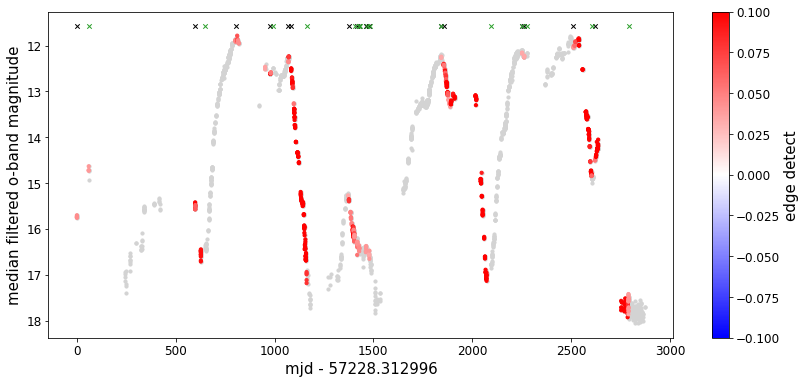

In [79]:
plt.figure(figsize=(14,6))
plt.scatter(median_filtered_oband['mjd']-mjd_scale,median_filtered_oband['m'],s=10,color='lightgrey')
plt.scatter(median_filtered_oband['mjd'][downward_mask]-mjd_scale,
            np.full(len(median_filtered_oband['mjd'][downward_mask]),np.min(median_filtered_oband['m']))-0.2
                    ,s=20,marker='x',color='k',zorder=3)
plt.scatter(median_filtered_oband['mjd'][upward_mask]-mjd_scale,
            np.full(len(median_filtered_oband['mjd'][upward_mask]),np.min(median_filtered_oband['m']))-0.2
                    ,s=20,marker='x',color='tab:green',zorder=3)
# plt.scatter(median_filtered_oband['mjd'][decline_onset]-mjd_scale,
#             np.full(len(median_filtered_oband['mjd'][decline_onset]),np.min(median_filtered_oband['m']))-0.2,
#                     s=20,marker='x',color='k',zorder=3)
plt.scatter(median_filtered_oband['mjd'][total_mask]-mjd_scale,median_filtered_oband['m'][total_mask],s=10,
            c=(edges_realdata[total_mask]),cmap='bwr')

plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='edge detect')
plt.clim(-0.1,0.1)
plt.show()

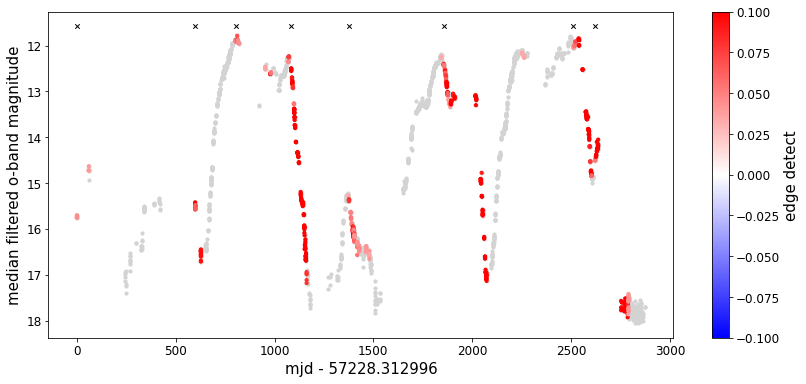

In [80]:
plt.figure(figsize=(14,6))
plt.scatter(median_filtered_oband['mjd']-mjd_scale,median_filtered_oband['m'],s=10,color='lightgrey')
# plt.scatter(median_filtered_oband['mjd'][downward_mask]-mjd_scale,
#             np.full(len(median_filtered_oband['mjd'][downward_mask]),np.min(median_filtered_oband['m']))-0.2
#                     ,s=20,marker='x',color='k',zorder=3)
# plt.scatter(median_filtered_oband['mjd'][upward_mask]-mjd_scale,
#             np.full(len(median_filtered_oband['mjd'][upward_mask]),np.min(median_filtered_oband['m']))-0.2
#                     ,s=20,marker='x',color='tab:green',zorder=3)
plt.scatter(median_filtered_oband['mjd'][decline_onset]-mjd_scale,
            np.full(len(median_filtered_oband['mjd'][decline_onset]),np.min(median_filtered_oband['m']))-0.2,
                    s=20,marker='x',color='k',zorder=3)
plt.scatter(median_filtered_oband['mjd'][total_mask]-mjd_scale,median_filtered_oband['m'][total_mask],s=10,
            c=(edges_realdata[total_mask]),cmap='bwr')

plt.gca().invert_yaxis()
plt.xlabel('mjd - '+str(mjd_scale))
plt.ylabel('median filtered o-band magnitude')
plt.colorbar(label='edge detect')
plt.clim(-0.1,0.1)
# plt.savefig('/Users/ccra8514/Desktop/decline_detect',bbox_inches='tight')
plt.show()